In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# matplot gallery 참고
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('./data/final_train.csv')
df_test = pd.read_csv('./data/final_test.csv')


In [3]:
df_train.drop(['Unnamed: 0'], axis=1, inplace=True)
df_test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

Train set 에서 Train : valid 7:3 으로 나눔

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, target_label, test_size=0.3, random_state=2022)

In [6]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
prediction = model.predict(X_valid)

In [8]:
prediction

print("총 {}명 중 {:.2f}% 정확도로 생존 맞춤".format(y_valid.shape[0],100*metrics.accuracy_score(prediction, y_valid)) )

총 268명 중 79.48% 정확도로 생존 맞춤


- Feature importance

In [9]:
feature_importance = model.feature_importances_
Series_feat_imp = pd.Series(feature_importance, index=df_test.columns)


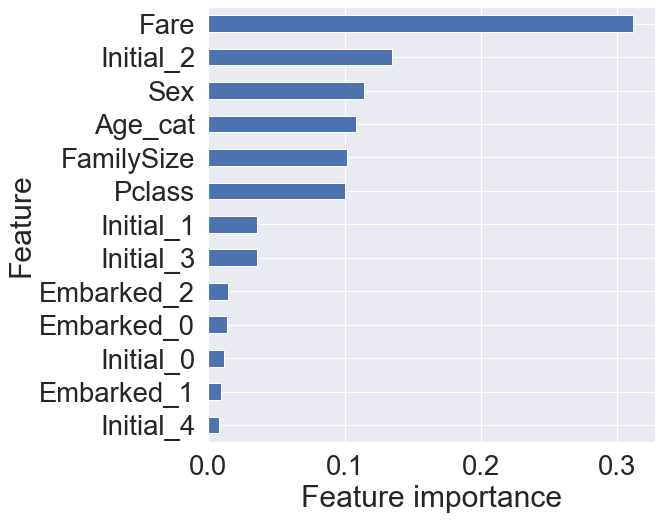

In [10]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()


In [11]:
submission = pd.read_csv("./data/gender_submission.csv")
submission 

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [12]:
prediction = model.predict(X_test)

In [13]:
submission["Survived"] = prediction

In [14]:
submission.to_csv("./my_first_submission.csv",index=False)